# Machine Learning Project - 11: **Stock Price Prediction (Time Series Forecasting) **

**Install Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


**Load the Dataset:**

In [ ]:
# Load the dataset (Ensure the CSV file is in the same directory or provide the full path)
df = pd.read_csv("yahoo_stock.csv")

# Check the first few rows
print(df.head())

# Extract only the 'Close' price for prediction
df = df[['Close']]


         Date         High          Low         Open        Close        Volume    Adj Close
0  2015-11-23  2095.610107  2081.389893  2089.409912  2086.590088  3.587980e+09  2086.590088
1  2015-11-24  2094.120117  2070.290039  2084.419922  2089.139893  3.884930e+09  2089.139893
2  2015-11-25  2093.000000  2086.300049  2089.300049  2088.870117  2.852940e+09  2088.870117
3  2015-11-26  2093.000000  2086.300049  2089.300049  2088.870117  2.852940e+09  2088.870117
4  2015-11-27  2093.290039  2084.129883  2088.820068  2090.110107  1.466840e+09  2090.110107


**Data Preprocessing**

In [ ]:
# Normalize the data to scale values between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(df)

# Function to create sequences
def create_sequence(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:i+time_step])
        y.append(data[i+time_step])
    return np.array(X), np.array(y)

# Set time step
time_step = 60

# Split data into training and testing sets (80% train, 20% test)
train_size = int(len(data_scaled) * 0.8)
train_data = data_scaled[:train_size]
test_data = data_scaled[train_size:]

X_train, y_train = create_sequence(train_data, time_step)
X_test, y_test = create_sequence(test_data, time_step)


 Build LSTM Model

In [ ]:
# Define the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_step, 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Display model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

**Train the Model**

In [ ]:
# Train the model
model.fit(X_train, y_train, batch_size=16, epochs=20, validation_data=(X_test, y_test))


Epoch 1/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - loss: 0.0299 - val_loss: 0.0046
Epoch 2/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0025 - val_loss: 0.0043
Epoch 3/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - loss: 0.0016 - val_loss: 0.0040
Epoch 4/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 0.0015 - val_loss: 0.0039
Epoch 5/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - loss: 0.0013 - val_loss: 0.0036
Epoch 6/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - loss: 9.8769e-04 - val_loss: 0.0043
Epoch 7/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - loss: 0.0011 - val_loss: 0.0035
Epoch 8/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - loss: 8.1875e-04 - val_loss: 0.0032
Epoch 9/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - loss: 8.4845e-04 - val_loss: 0.0031
Epoch 10/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 7.4368e-04 - val_loss: 0.0032
Epoch 11/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - loss: 6.3667e-04 - val_loss: 0.0030
Epoch 12/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s

**Make Predictions**

In [ ]:
# Predict stock prices
predicted_stock_price = model.predict(X_test)

# Inverse transform the predicted values to original scale
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

# Inverse transform the actual values
real_stock_price = scaler.inverse_transform(y_test.reshape(-1, 1))


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step


**Visualize the Results**

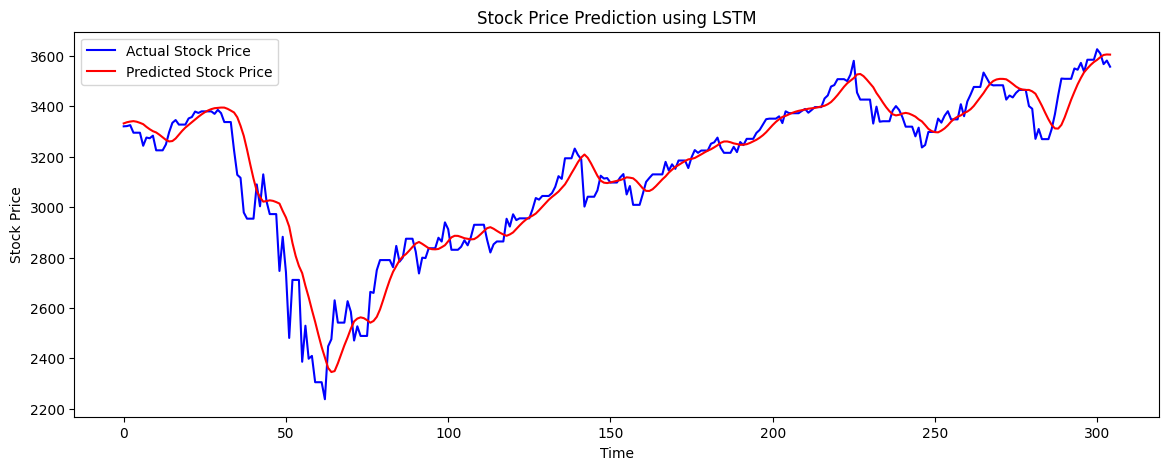

In [ ]:
# Plot actual vs. predicted stock prices
plt.figure(figsize=(14, 5))
plt.plot(real_stock_price, color='blue', label='Actual Stock Price')
plt.plot(predicted_stock_price, color='red', label='Predicted Stock Price')
plt.title("Stock Price Prediction using LSTM")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()


**Save & Load Model**

In [ ]:
# Save the trained model
model.save("stock_price_model.h5")

# Load the model when needed
from tensorflow.keras.models import load_model
model = load_model("stock_price_model.h5")
